In [1]:
import playsound
import pyttsx3
import speech_recognition as sr
import re
import webbrowser
import urllib.request
import urllib.parse

b'<!DOCTYPE html><!--[if IEMobile 7]><html class="iem7" lang="en" dir="ltr"><![endif]--><!--[if lte IE 6]><html class="lt-ie9 lt-ie8 lt-ie7" lang="en" dir="ltr"><![endif]--><!--[if (IE 7)&(!IEMobile)]><html class="lt-ie9 lt-ie8" lang="en" dir="ltr"><![endif]--><!--[if IE 8]><html class="lt-ie9" lang="en" dir="ltr"><![endif]--><!--[if (gte IE 9)|(gt IEMobile 7)]><!--><html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#" ><!--<![endif]--><head><meta charset="utf-8" /><title>News - Breaking News, Latest News &amp; Top Video News</title><meta name="viewport" content="width=device-width, minimum-scale=1, initial-scale=1.0, maximum-scale=5.0" /> <!--[if IE]><![endif]--><link rel="canonical
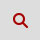
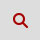
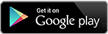
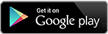
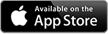
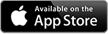
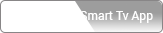
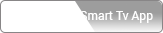

In [2]:
url='https://www.indiatoday.in/news.html'

values ={'s':'basics','submit':'search'}
data= urllib.parse.urlencode(values)
data=data.encode('utf-8')
req= urllib.request.Request(url,data)
resp=urllib.request.urlopen(req)
respData=resp.read()
print(respData)

In [3]:
paragraphs = re.findall(r'title="(.*?)"',str(respData))

In [4]:
paragraphs.remove('RSS - News')
paragraphs.remove('navigation')
paragraphs.remove('News')
paragraphs.remove('TV')
paragraphs.remove('Home')
paragraphs.remove('APP')
paragraphs.remove('Magazine')
paragraphs.remove('Follow us')
paragraphs.remove('Sitemap')
paragraphs.remove('Andriod App')
paragraphs.remove('IOS App')
paragraphs.remove('SmartTv App')
paragraphs.remove('Follow us')

def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list
paragraphs=Remove(paragraphs)

In [5]:
def speak(text):
    language='en'
    engine=pyttsx3.init()
    engine.say(text)
    engine.runAndWait()
    

In [8]:
while True:
    query=''
    src=sr.Recognizer()
    r=sr.Recognizer()
    print("listening...")
    with sr.Microphone() as source:
        audio=src.listen(source)
        query=r.recognize_google(audio, language='en-US')
        print(query)    
    if "hello Alexa" in query or "hi Alexa" in query or "hey Alexa" in query:
        print('hello welcome what do you want me to do')
        speak('hello welcome what do you want me to do')
    elif "how are you" in query or "how is it going" in query:
        print("i am fine thank you")
        speak("i am fine thank you")
    elif "what can you do" in query or "who are you" in query:
        print("i am your assistant. I  can read out the latest news for you")
        speak("i am your assistant. I  can read out the latest news for you")
    elif "headlines" in query or "breaking" in query:
        for i in range(1,4):
            print(paragraphs[i])
            speak(paragraphs[i])
    elif "india" in query or "national" in query:
        for i in range(4,12):
            print(paragraphs[i])
            speak(paragraphs[i])
    elif "movie" in query or "movies" in query:
        for i in range(12,20):
            print(paragraphs[i])
            speak(paragraphs[i])
    elif "election" in query or "elections" in query:
        for i in range(20,28):
            print(paragraphs[i])
            speak(paragraphs[i])
    elif "sports" in query or "sport" in query:
        for i in range(20,28):
            print(paragraphs[i])
            speak(paragraphs[i])   
    elif "trending" in query:
        for i in range(28,36):
            print(paragraphs[i])
            speak(paragraphs[i])
    elif "technology" in query or "technological" in query:
        for i in range(36,44):
            print(paragraphs[i])
            speak(paragraphs[i])
    elif "exit" in query or "thank you" in query or "thanks" in query:
        print("thank you for using. hope you liked it")
        speak("thank you for using. hope you liked it")
        break
    else:
        print("i am sorry i did not understand")
        speak("i am sorry i did not understand")
        print("do you want to know about a particular news ? i can open it for you")
        speak("do you want to know about a particular news ? i can open it for you")
        src=sr.Recognizer()
        r=sr.Recognizer()
        print("listening...")
        with sr.Microphone() as source:
            audio=src.listen(source)
            query=r.recognize_google(audio, language='en-US')
            print(query)
        if "yes" in query or "yeah" in query or "yup" in query:
            print("what do you want me to open")
            speak("what do you want me to open")
            src=sr.Recognizer()
            r=sr.Recognizer()
            print("listening...")
            with sr.Microphone() as source:
                audio=src.listen(source)
                music_name=r.recognize_google(audio, language='en-US')
                print(music_name)
            print("opening in browser")
            speak("opening in browser")
            Google_url="https://www.google.com/search?q={}"
            search_url=Google_url.format(music_name+" news")
            webbrowser.open(search_url)
            break
        else:
            print("okay")
            speak("okay")
    
    

listening...
hello Alexa
hello welcome what do you want me to do
listening...
read out some national news
Bihar poll results: NDA, Grand Alliance in close fight in trends in 125 seats
 Early trends shortly as counting begins for Bihar verdict
Election Intelligence Dashboard: All you need to know about the latest trends in Bihar 
Gujarat Bypoll Results LIVE: BJP gains early leads in 7 seats, Congress leads in Morbi
India reports 38,074 new coronavirus cases, 448 deaths
Bihar elections 2020: In early trends, NDA leads in 15 seats, Grand Alliance in 9
Dubbaka by-election result: BJP leading with 20,226 votes, TRS trailing by 2,000 votes
Bihar poll results: Gauging the mood of people in Raghopur
listening...
read out some sports news
Manju Varma of JDU trails from Cheria Bariarpur, RJD candidate leads by over 7,000 votes
BJP focused on wrong issues in Bihar, demonetisation was black chapter, says Shiv Sena editorial
IND vs AUS: 30,000 fans allowed per day at Gabba, 27,000 for D/N Test in A

In [9]:
print("thank you for watching the video")
speak("thank you for watching the video")

thank you for watching the video
